<a href="https://colab.research.google.com/github/ReddySameer/tensorflow/blob/main/05_transfer_learningIn_tensorflow_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-29 19:02:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-29 19:02:36 (72.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
 !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-05-29 19:02:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  61.1MB/s    in 2.6s    

2024-05-29 19:02:41 (61.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
from helper_functions import load_and_prep_image, create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
# check how many images in the images and subdirctoryuies

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [8]:
# create training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir =  "10_food_classes_10_percent/test"

In [9]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:

train_data_10_percent

NameError: name 'train_data_10_percent' is not defined

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[159.35715   141.35715   129.35715  ]
   [158.66837   140.66837   128.66837  ]
   [158.71939   140.71939   128.71939  ]
   ...
   [152.92851   130.92851   117.928505 ]
   [155.28558   133.28558   120.28558  ]
   [133.51526   111.51526    98.51526  ]]

  [[161.28572   143.28572   131.28572  ]
   [160.92857   142.92857   130.92857  ]
   [161.92857   143.92857   131.92857  ]
   ...
   [151.301     132.301     118.300995 ]
   [148.29065   129.29065   115.29065  ]
   [131.11244   112.11244    98.11244  ]]

  [[162.64285   144.64285   132.64285  ]
   [160.71428   142.71428   130.71428  ]
   [160.42857   142.42857   130.42857  ]
   ...
   [152.68872   133.68872   119.68873  ]
   [143.4284    124.4284    110.4284   ]
   [139.021     120.020996  106.020996 ]]

  ...

  [[250.50511   242.50511   231.50511  ]
   [251.82655   243.82655   232.82655  ]
   [251.33672   243.33672   232.33672  ]
   ...
   [234.40804   219.9795    206.88768  ]
   [231.84175   217.84175   204.84175  ]
   [2

# Functional API is more flexible and is able to produce more sophiticated models

** The Functional API can handle models with non-linear topology, shared layers and include multiple inputs and outputs

In [13]:
# 1. Create the base model with Functional API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# 2. Freeze the base model (so the underlying pre-trained models are not updated)
base_model.trainable = False

# 3. Create inputs into the model
inputs = tf.keras.layers.Input(shape=(224,224, 3), name="input_layer")

# 4. if using a model such as ResNet50V2, then normalize the input
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255) (inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"shape after passing the inputs to the base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after passing throught the average global average pooling: {x.shape}")

# 7. create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer") (x)

# 8. Compine the inputs and with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. fit the model
model_0_history = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data_10_percent,
                              validation_steps=int(0.25 * len(test_data_10_percent)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_percent_feature_extraction")])



16705208/16705208 [==============================] - 0s 0us/step
shape after passing the inputs to the base model: (None, 7, 7, 1280)
shape after passing throught the average global average pooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240529-131432
Epoch 1/5
24/24 [==============================] - 106s 4s/step - loss: 1.9548 - accuracy: 0.3600 - val_loss: 1.3336 - val_accuracy: 0.7484
Epoch 2/5
24/24 [==============================] - 132s 6s/step - loss: 1.1355 - accuracy: 0.7547 - val_loss: 0.8882 - val_accuracy: 0.8059
Epoch 3/5
24/24 [==============================] - 136s 6s/step - loss: 0.8142 - accuracy: 0.8307 - val_loss: 0.7101 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 137s 6s/step - loss: 0.6515 - accuracy: 0.8587 - val_loss: 0.6317 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 137s 6s/step - loss: 0.5503 - accuracy: 0.8747 - val_loss: 0.5697 - val_accuracy

In [14]:
# check the layers
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [28]:
model_0.summary(), base_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

(None, None)

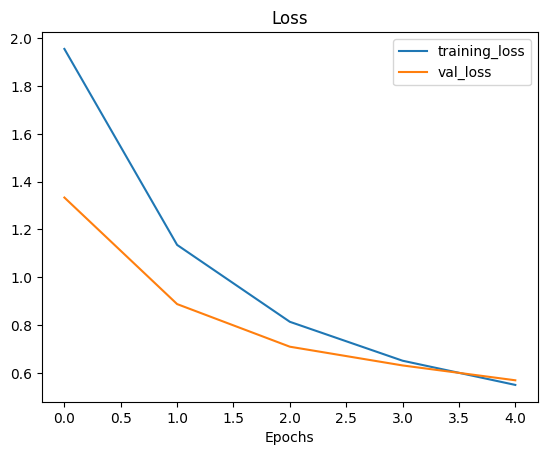

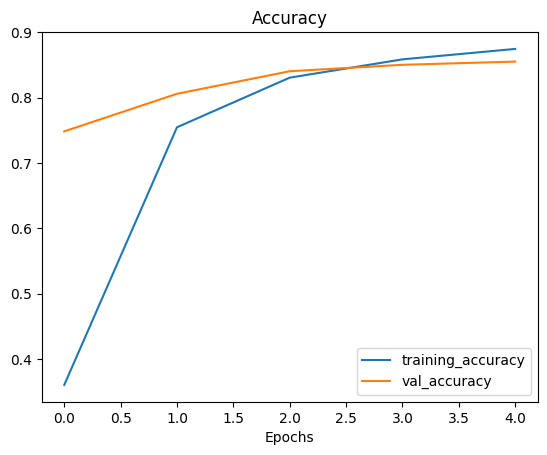

In [16]:
plot_loss_curves(model_0.history)

## Getting a feature vector from a tained model

Globak Average Pooling 2D Layer

The tensor after the model goes through  the `base_model` of shape (None, 7, 7, 1280)

then it passes through the GlobalAveragePooling2D, it turns into (None, 1280)


In [17]:
## pass a tensor with shape (1,4,4,3) through the Global Average Pooling 2D layer

input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}")

# pass the random tensor through the  Global Average pooling 2D layer
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n{global_average_pooling_layer}")
print(f"shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global average pooled random tensor:\n{global_average_pooling_layer.shape}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
2D global average pooled random tensor:
[[-0.09368646 -0.45840445 -0.28855976]]
shape of input tensor: (1, 4, 4, 3)
Shape of 2D global average pooled random tensor:
(1, 3)


In [18]:
# To replicate the GlobalAveragePooling 2D layer
# for the given input tensor shape(1,4,4,3) it averages on the 1,2 items(4,4) in the shape
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

# Pretrained models output a feature vector, a long tensor of numbers which represents the learned representation of the model on a particular sample, then this can be used to extract the patterns out of for our specific problem

In [19]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}")

_# pass the random tensor through the  Max Pool 2D layer
max_pool2D_layer = tf.keras.layers.MaxPool2D()(input_tensor)
print(f"2D global average pooled random tensor:\n{max_pool2D_layer}")
print(f"shape of input tensor: {input_tensor.shape}")
print(f"Shape of max_pool2D_layer random tensor:\n{max_pool2D_layer.shape}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
2D global average pooled random tensor:
[[[[ 0.8504023  -0.40604794  0.3194337 ]
   [ 0.9058464   0.539707    1.6994323 ]]

  [[ 0.77852213  0.40125778  0.97772694]
   [ 0.32410017  1.1603122   0.5274477 ]]]]
shape of input tensor: (1, 4, 4, 3)
Shape of max_pool2D_layer random tensor:
(1, 2, 2, 3)


## Running a series of transfer learning experiments

1. `model_1` - use feature exraction transfer learning with 1% of the training data  with data augmentation
2. `model_2` - use feature exraction transfer learning with 10% of the training data  with data augmentation
3. `model_3` - fine tuning transfer learning with 10% of the training data  with data augmentation
4. `model_4` - fine tuning transfer learning with 100% of the training data  with data augmentation

In [20]:
# Download and unzip data for Model 1
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2024-05-29 13:26:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.59, 172.217.12.27, 142.250.65.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   189MB/s    in 0.7s    

2024-05-29 13:26:20 (189 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
# create training and data for 1%
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [22]:
walk_through_dir(train_dir_1_percent)
walk_through_dir(test_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
T

In [23]:
IMG_SIZE= (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
print(tf.__version__)

2.15.0


# To add Data Augmentation in the models,  we can use teh layers in inside

* tf.keras.experimental.preprocessing
* Preprocessing (augmementation) of the images happen on the GPU
* Image data augmentation only happens during training

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create a data augmentation  stage with horizontasl flipping, rotations, zooms etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    #preprocessing.Rescale(1./255)
], name="data_augmentation")

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"  + target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir + "/" + random_image
print(random_image_path)
img = mpimg.imread(random_image_path)
print(img)
plt.title(f"Original random image from class {target_class}")
plt.imshow(img)
plt.axis(False)

NameError: name 'train_data_1_percent' is not defined

Text(0.5, 1.0, 'Augmented random Image from class: pizza')

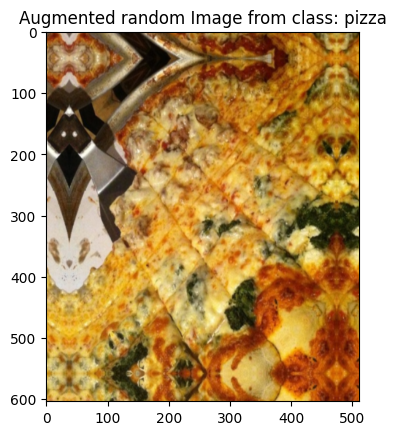

In [27]:
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.0)
plt.title(f"Augmented random Image from class: {target_class}")

In [40]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape=input_shape, name="input_shape")
x=data_augmentation(inputs)

x=base_model(x, training=False)
x=layers.GlobalAveragePooling2D() (x)
outputs = layers.Dense(10, activation="softmax", name="output_layer") (x)
model_1=keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1_history = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data_1_percent,
            validation_steps=int(0.25 * len(test_data_10_percent)),
            callbacks=(create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="1_percent_data_aug")))


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240529-134425
Epoch 1/5
3/3 [==============================] - 97s 43s/step - loss: 2.2453 - accuracy: 0.1286 - val_loss: 2.1699 - val_accuracy: 0.2237
Epoch 2/5
3/3 [==============================] - 88s 42s/step - loss: 2.0701 - accuracy: 0.3000 - val_loss: 2.0528 - val_accuracy: 0.3043
Epoch 3/5
3/3 [==============================] - 48s 23s/step - loss: 1.8191 - accuracy: 0.5286 - val_loss: 1.9467 - val_accuracy: 0.4013
Epoch 4/5
3/3 [==============================] - 86s 42s/step - loss: 1.6599 - accuracy: 0.6143 - val_loss: 1.8409 - val_accuracy: 0.4901
Epoch 5/5
3/3 [==============================] - 46s 22s/step - loss: 1.5266 - accuracy: 0.7429 - val_loss: 1.7724 - val_accuracy: 0.5214


In [41]:
results_1_percent_data_aug = model_1.evaluate(test_data_1_percent)
results_1_percent_data_aug

79/79 [==============================] - 184s 2s/step - loss: 1.7423 - accuracy: 0.5340


[1.7423341274261475, 0.5339999794960022]

In [42]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

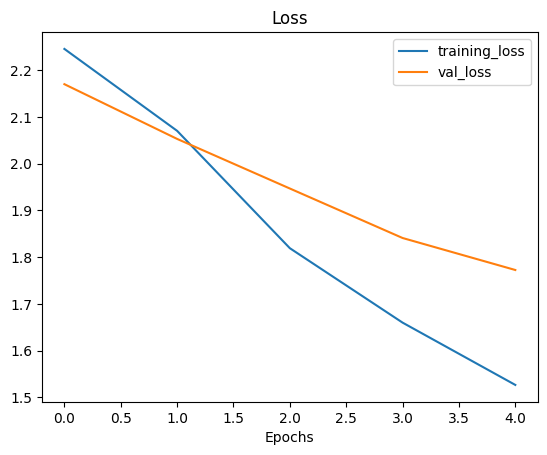

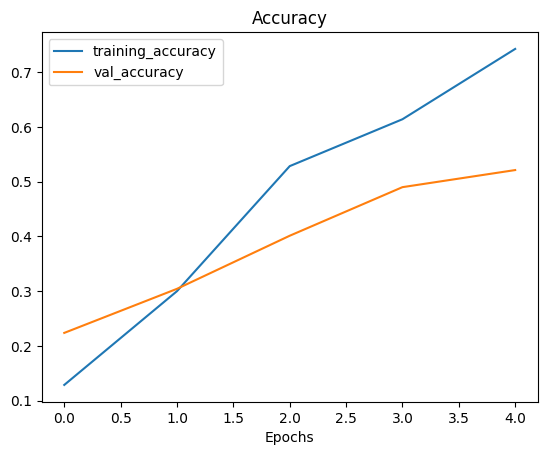

In [43]:
plot_loss_curves(model_1_history)

# Model_2 feature extraction learning model layer with 10% data

In [13]:
# create training and test directory paths
train_data_10_percent_dir = "10_food_classes_10_percent/train"
test_data_10_percent_dir =  "10_food_classes_10_percent/test"

In [14]:
import tensorflow as tf
IMG_SIZE=(224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_data_10_percent_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_data_10_percent_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [59]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [60]:
data_augmentation.summary()

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, None, None, 3)     0         
                                                                 
 random_rotation (RandomRot  (None, None, None, 3)     0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, None, None, 3)     0         
                                                                 
 random_height (RandomHeigh  (None, None, None, 3)     0         
 t)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    #preprocessing.Rescaling(1./255) # rescale data For Resnet50V2,  rescaling is built-in in the EfficientNetB0
], name="data_augmentation")

In [46]:
input_shape=(224, 224, 3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # Augmentation doesnt happen on test data
x = base_model(x, training=False) # pass the augmented images to the base model but keep it in inference mode,
 #(training is turned off and weights are not updated) this also ensure batchnorm statistics dont get updated even after the base model is unfreezed for finetuning
#batchnorm -> Batch Normalization
# the base model return a multidimensional vector

# convert the multidimensional vector to single feature layer
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])





In [74]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_2D   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [18]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [19]:
initial_epochs = 5
model_2_history = model_2.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data_10_percent,
                              validation_steps=(0.25 * len(test_data_10_percent)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="10_percent_data_aug"),
                                         checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240529-190518
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0422 - accuracy: 0.3093
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 178s 7s/step - loss: 2.0422 - accuracy: 0.3093 - val_loss: 1.3982 - val_accuracy: 0.7031
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3260 - accuracy: 0.6920
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 152s 6s/step - loss: 1.3260 - accuracy: 0.6920 - val_loss: 0.9351 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0111 - accuracy: 0.7613
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 154s 7s/step - loss: 1.0111 - accuracy: 0.7613 - val_loss: 0.7146 - val_accuracy: 0.8391
Epoch 4

# ModelCheckpoint Callback - Save model as it trains, so that it can be stop training when needed and then later restart from where it was stopped. This is helpful when the training takes along time
tf.keras.callbacks.ModelCheckpoint


In [21]:
results_10_percent_data_aug = model_0.evaluate(test_data_10_percent)

NameError: name 'model_0' is not defined

In [22]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 218s 3s/step - loss: 0.6187 - accuracy: 0.8416


[0.61865234375, 0.8416000008583069]

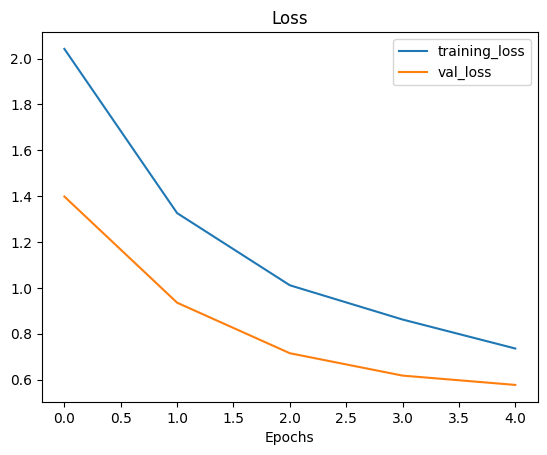

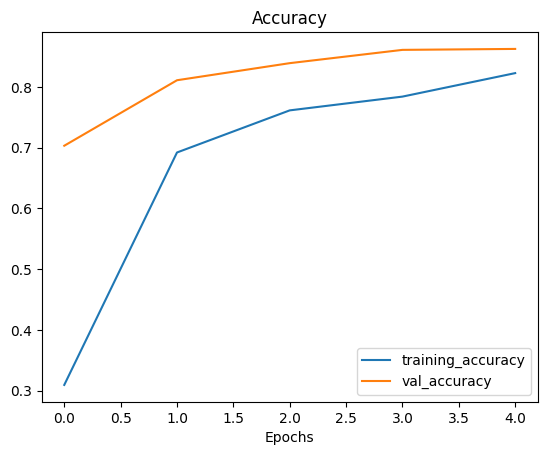

In [24]:
plot_loss_curves(model_2_history)

In [25]:
#Load a checkpointed weights returns a model to a specific checkpoint
model_2.load_weights(checkpoint_path)

In [26]:
loaded_weights_model_results = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 201s 3s/step - loss: 0.6187 - accuracy: 0.8416


# If the results from the evaluate method on model2 matches with the results from the model2_eavaluate after reloading the saved checkpoints weights, then that is correct

In [ ]:
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

In [ ]:
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

## Model 3 Fine Tuning the existing model

* Fine Tuning an works best after training a feature extraction model for a few epochs with large custom data

In [48]:
model_2.layers
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f5cbe44a8f0> True
<keras.src.engine.sequential.Sequential object at 0x7f5cce3dbee0> False
<keras.src.engine.functional.Functional object at 0x7f5cbbddace0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f5cbc06d360> True
<keras.src.layers.core.dense.Dense object at 0x7f5cbbddb9a0> True


In [49]:
model_2.layers
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)


0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [51]:
# how many trainable variables are in the base model
print(len(model_2.layers[2].trainable_variables))

0


# To begin fine tuning
set the base model to trainable
then the set the selected models for freezing




In [53]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [56]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)


0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [57]:


model_2.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # to fine tune lower the learning rate by 10%
                   metrics=["accuracy"])


In [59]:
for layer_number, layer in enumerate(model_2.layers[2].layer):
  print(layer_number, layer.name, layer.trainable)


AttributeError: 'Functional' object has no attribute 'layer'

In [60]:
len(model_2.trainable_variables)

12

In [61]:
fine_tune_epochs = initial_epochs + 5
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10_percent,
                                               validation_steps=int(0.25 * len(test_data_10_percent)),
                                               initial_epoch=model_2_history.epoch[-1], # previous last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")]
                                               )

Saving TensorBoard log files to: transfer learning/10_percent_fine_tune_last_10/20240529-202025
Epoch 5/10
24/24 [==============================] - 132s 5s/step - loss: 2.2106 - accuracy: 0.2253 - val_loss: 1.8252 - val_accuracy: 0.4934
Epoch 6/10
24/24 [==============================] - 146s 6s/step - loss: 1.6019 - accuracy: 0.5733 - val_loss: 1.1994 - val_accuracy: 0.7155
Epoch 7/10
24/24 [==============================] - 141s 6s/step - loss: 1.0996 - accuracy: 0.7160 - val_loss: 0.7962 - val_accuracy: 0.7911
Epoch 8/10
24/24 [==============================] - 180s 7s/step - loss: 0.8445 - accuracy: 0.7600 - val_loss: 0.6465 - val_accuracy: 0.8026
Epoch 9/10
24/24 [==============================] - 161s 7s/step - loss: 0.6659 - accuracy: 0.8120 - val_loss: 0.5371 - val_accuracy: 0.8289
Epoch 10/10
24/24 [==============================] - 176s 7s/step - loss: 0.5802 - accuracy: 0.8280 - val_loss: 0.4914 - val_accuracy: 0.8438


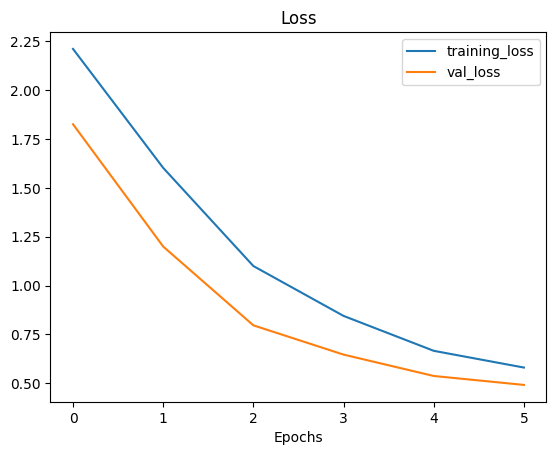

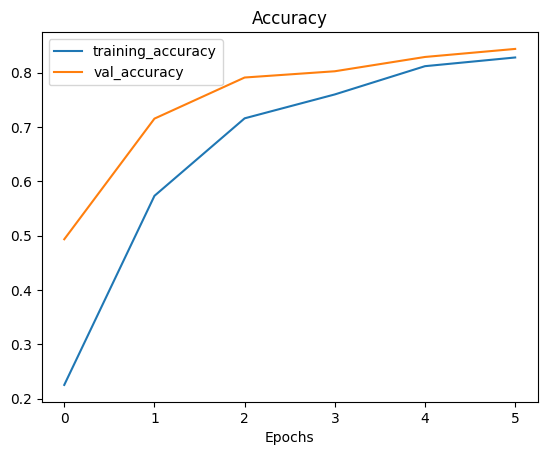

In [62]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [76]:
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compares two Tensorflow History objects
  """

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="training accuracy")
  plt.plot(total_val_acc, label="val accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="training loss")
  plt.plot(total_val_loss, label="val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")


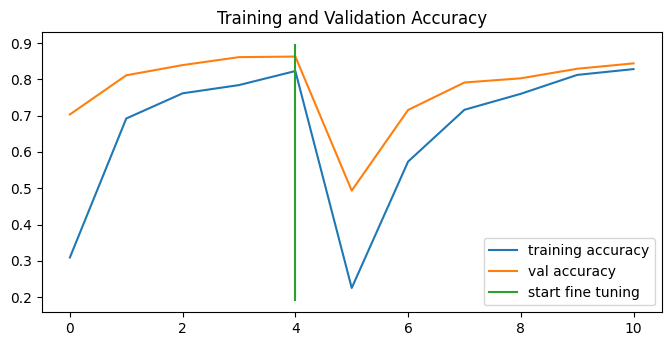

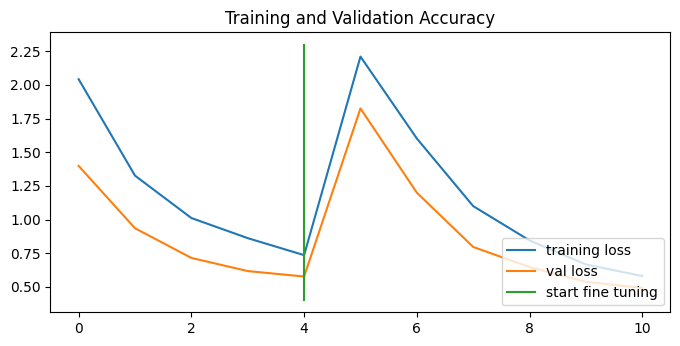

In [77]:
compare_history(model_2_history,
                history_fine_10_percent_data_aug,
                initial_epochs=5)

# Download and unzip 10 classes of Food101 data with all images


In [79]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-05-29 20:48:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  40.9MB/s    in 11s     

2024-05-29 20:48:16 (46.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [81]:
# setup trainig and test dir
train_data_all_dir = "10_food_classes_all_data/train"
test_data_all_dir =  "10_food_classes_all_data/test"


In [83]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [85]:

import tensorflow as tf
IMG_SIZE=(224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_data_all_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_data_all_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [108]:
len(test_data_10_classes_full)

79

In [87]:
model_2.evaluate(test_data_10_classes_full)


79/79 [==============================] - 229s 3s/step - loss: 0.5775 - accuracy: 0.8088


[0.5774953961372375, 0.8087999820709229]

# To fine tune a fine-tuning model, revert model_2 to its feature extraction weights

Load weights from Check point.

In [ ]:
model_2.load_weights(checkpoint_path)

In [88]:
model_2.evaluate(test_data_10_classes_full)

79/79 [==============================] - 316s 4s/step - loss: 0.5775 - accuracy: 0.8088


[0.5774954557418823, 0.8087999820709229]

# fine tune the model_2 for the whole data




In [89]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation False
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
for layer_number, layer in enumerate(model_2.layers[2]): # not working
  print(layer_number, layer.name, layer.trainable)

In [104]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs * 5
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data_10_classes_full,
                                           validation_steps=(0.25 * len(test_data_10_classes_full)),
                                           initial_epoch=history_fine_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name="full_10_classes_data")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_data/20240529-222529
Epoch 10/25
235/235 [==============================] - 791s 3s/step - loss: 0.6735 - accuracy: 0.7804 - val_loss: 0.3630 - val_accuracy: 0.8781
Epoch 11/25
235/235 [==============================] - 754s 3s/step - loss: 0.5469 - accuracy: 0.8232 - val_loss: 0.3263 - val_accuracy: 0.8875
Epoch 12/25
235/235 [==============================] - 788s 3s/step - loss: 0.4817 - accuracy: 0.8424 - val_loss: 0.2745 - val_accuracy: 0.9047
Epoch 13/25
235/235 [==============================] - 761s 3s/step - loss: 0.4465 - accuracy: 0.8569 - val_loss: 0.2861 - val_accuracy: 0.9000
Epoch 14/25
235/235 [==============================] - 733s 3s/step - loss: 0.4109 - accuracy: 0.8667 - val_loss: 0.2735 - val_accuracy: 0.9078
Epoch 15/25
235/235 [==============================] - 726s 3s/step - loss: 0.3835 - accuracy: 0.8783 - val_loss: 0.2533 - val_accuracy: 0.9109
Epoch 16/25
235/235 [===========================

In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data_10_classes_full)

In [ ]:
compare_history(original_history=history_fine_10_classes_full,
                new_history=history_fine_10_classes_full,
                initial_epochs=5)

In [ ]:
## Viewing the experiment data on Tensorboard

